In [78]:
eleicao <- read.csv(
    "../data/Eleicao.csv",
    sep = ";",
    na.strings = "",
    stringsAsFactors = TRUE
)

head(eleicao, 10)


,CANDIDATO,SITUACAO,DESPESAS
,<fct>,<int>,<int>
1,George Turner,0,10
2,Victor Johnson,0,100
3,Jerry Perry,1,1600
4,Shirley Cook,1,1500
5,Carolyn Bailey,1,3300
6,Susan Sanders,0,200
7,Anthony Harris,1,1800
8,Philip Richardson,1,1700
9,Eugene Phillips,0,300


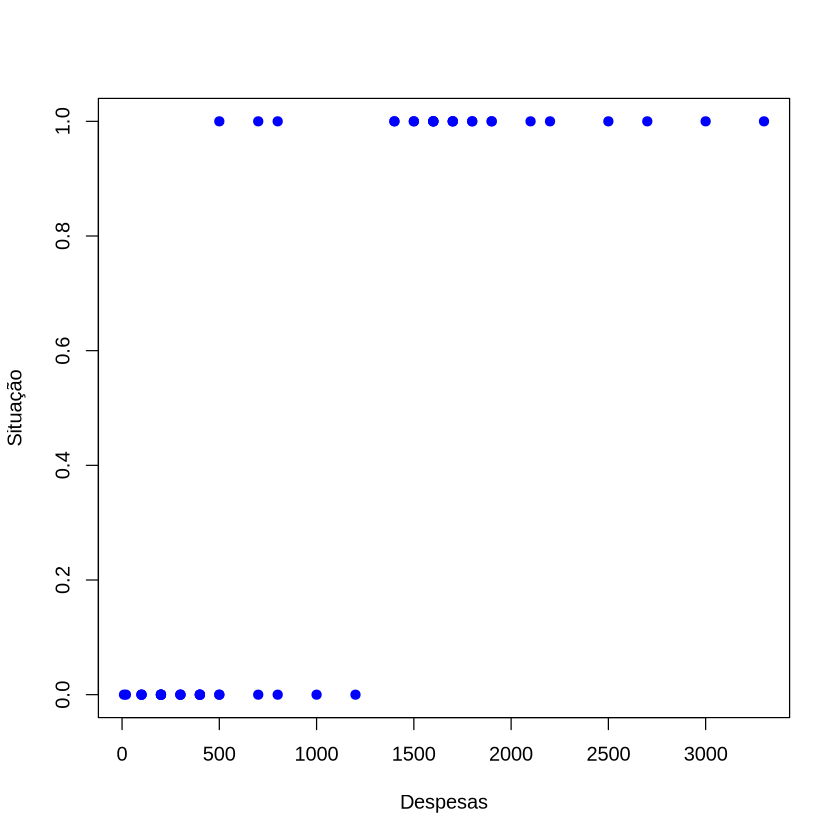

In [79]:
plot(eleicao$DESPESAS, eleicao$SITUACAO, col = "blue", pch = 19, xlab = "Despesas", ylab = "Situação")


In [80]:
summary(eleicao)


             CANDIDATO     SITUACAO         DESPESAS   
  Gary Peterson   : 1   Min.   :0.0000   Min.   :  10  
  Pamela Bryant   : 1   1st Qu.:0.0000   1st Qu.: 300  
 Andrea Washington: 1   Median :1.0000   Median : 800  
 Annie Brooks     : 1   Mean   :0.5106   Mean   :1086  
 Anthony Harris   : 1   3rd Qu.:1.0000   3rd Qu.:1700  
 Barbara White    : 1   Max.   :1.0000   Max.   :3300  
 (Other)          :41                                  

In [81]:
cor(eleicao$DESPESAS, eleicao$SITUACAO, use = "complete.obs")


[1] 0.8121872

In [82]:
modelo <- glm(SITUACAO ~ DESPESAS, data = eleicao, family = binomial)
summary(modelo)



Call:
glm(formula = SITUACAO ~ DESPESAS, family = binomial, data = eleicao)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.602880   1.315934  -3.498 0.000469 ***
DESPESAS     0.004984   0.001404   3.550 0.000385 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 18.540  on 45  degrees of freedom
AIC: 22.54

Number of Fisher Scoring iterations: 7


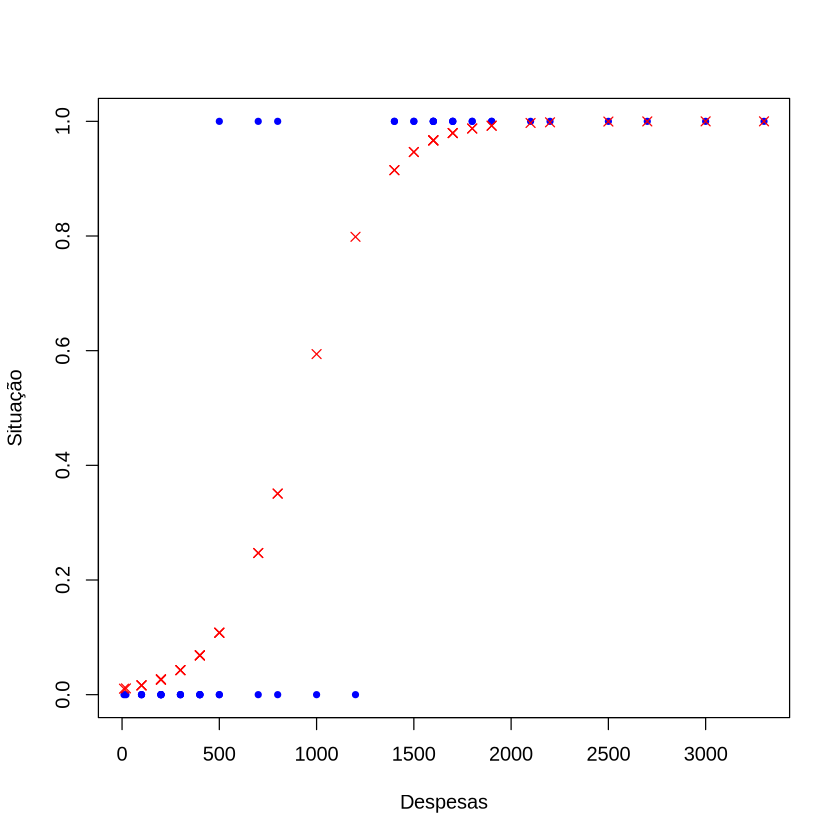

In [84]:
plot(eleicao$DESPESAS, eleicao$SITUACAO, col = "blue", pch = 20, xlab = "Despesas", ylab = "Situação")
points(eleicao$DESPESAS, modelo$fitted.values, col = "red", pch = 4)


In [85]:
prever <- predict(modelo, newdata = eleicao, type = "response")
prever <- prever >= 0.5
prever


1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE 
   40    41    42    43    44    45    46    47 
 TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

In [86]:
confusao <- table(prever, eleicao$SITUACAO)
confusao


       
prever   0  1
  FALSE 21  3
  TRUE   2 21

In [87]:
taxaacerto <- (confusao[1] + confusao[4]) / sum(confusao)
taxaacerto


[1] 0.893617

In [89]:
prevereleicao <- read.csv(
    "../data/NovosCandidatos.csv",
    sep = ";",
    na.strings = "",
    stringsAsFactors = TRUE
)

head(prevereleicao, 10)


,CANDIDATO,DESPESAS
,<fct>,<int>
1,A,0
2,B,10
3,C,200
4,D,500
5,E,900
6,F,1500
7,G,3000


In [91]:
prevereleicao$RESULT <- predict(modelo, newdata = prevereleicao, type = "response")
prevereleicao
prevereleicao$RESULT <- prevereleicao$RESULT >= 0.5
prevereleicao


CANDIDATO,DESPESAS,RESULT
<fct>,<int>,<dbl>
A,0,0.009923466
B,10,0.010425261
C,200,0.026438255
D,500,0.108027149
E,900,0.470635921
F,1500,0.946475247
G,3000,0.999967947


CANDIDATO,DESPESAS,RESULT
<fct>,<int>,<lgl>
A,0,FALSE
B,10,FALSE
C,200,FALSE
D,500,FALSE
E,900,FALSE
F,1500,TRUE
G,3000,TRUE
